# Import Important Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kruskal


import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [4]:
df = pd.read_csv("tiktok_dataset.csv")

In [5]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
len(df)

19382

In [9]:
print(df['claim_status'].unique())
print(df['verified_status'].unique())
print(df['author_ban_status'].unique())

['claim' 'opinion' nan]
['not verified' 'verified']
['under review' 'active' 'banned']


In [10]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [11]:
# jumlah influencer/ official account
len(df[df['verified_status']=='verified']) 

1240

In [12]:
df_normal = df[['video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']]

In [13]:
normalized = (df_normal - df_normal.min()) / (df_normal.max() - df_normal.min())
normalized.describe()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,0.254740,0.128156,0.065339,0.069990,0.036390
std,0.322959,0.202819,0.125078,0.133673,0.083304
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004923,0.001232,0.000449,0.000467,0.000104
50%,0.009937,0.005174,0.002799,0.003068,0.000938
75%,0.504409,0.190049,0.071144,0.077114,0.030420
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [14]:
df.dropna(inplace=True)

In [15]:
del df['#']

In [16]:
df.to_csv("tiktok data analysis clean_kel a.csv")

# Penambahan Kolom engagement

In [17]:
df['engagement'] = round(((df['video_like_count'] + df['video_share_count'] + df['video_comment_count']) / df['video_view_count']) * 100,2)

# Normal Distribution Test 

In [18]:
num_only = df.select_dtypes(include=['int','float']).columns
for i in num_only :
    print (f'normaltest utuk kolom {i}')
    stat,pvalue = normaltest(df[i])
    alpha = 0.05

    if pvalue > alpha :
        print(f'pvalue={pvalue}.pvalue > {alpha}. Fail to reject H0. Kita dapat asumsikan bawa data terdistribusi normal')
    else :
        print(f'pvalue={pvalue}.pvalue < {alpha}. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal')

normaltest utuk kolom video_id
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom video_duration_sec
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom video_view_count
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom video_like_count
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom video_share_count
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom video_download_count
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom video_comment_count
pvalue=0.0.pvalue < 0.05. Reject H0. Kita dapat asumsikan bawa data TIDAK terdistribusi normal
normaltest utuk kolom engagement
pvalue=1.5502293399498874e-

## Uji Spearman ##
Karena tidak terdistribusi normal, maka kita akan memakai uji statistik non parametrik

In [19]:
df_1=df.copy()
df_num_only = pd.DataFrame(df_1.select_dtypes(include=['int','float']))

In [20]:
tt_spearman = df_num_only.corr(method='spearman')
tt_spearman

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,engagement
video_id,1.000000,0.008394,0.004051,0.004762,0.000824,0.005848,0.006399,-0.000345
video_duration_sec,0.008394,1.000000,0.003025,0.005247,0.005400,0.006128,-0.005845,0.008621
video_view_count,0.004051,0.003025,1.000000,0.909813,0.863542,0.862036,0.835336,0.248509
video_like_count,0.004762,0.005247,0.909813,1.000000,0.939779,0.938575,0.899995,0.580807
video_share_count,0.000824,0.005400,0.863542,0.939779,1.000000,0.889633,0.857173,0.562505
video_download_count,0.005848,0.006128,0.862036,0.938575,0.889633,1.000000,0.950944,0.521619
video_comment_count,0.006399,-0.005845,0.835336,0.899995,0.857173,0.950944,1.000000,0.480022
engagement,-0.000345,0.008621,0.248509,0.580807,0.562505,0.521619,0.480022,1.000000


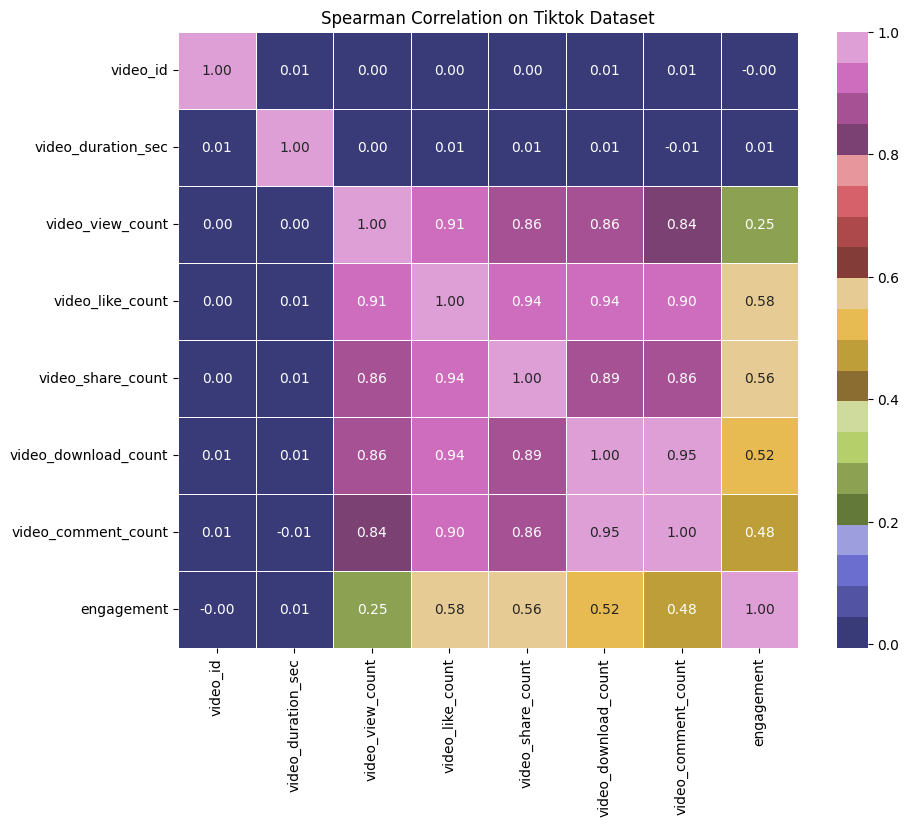

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(tt_spearman, annot=True,cmap='tab20b',fmt='.2f',linewidths=0.5)
plt.title ('Spearman Correlation on Tiktok Dataset')
plt.show()

### Kesimpulan:
- Korelasi antara durasi video dengan semua kolom numerik **sangat lemah**
- Korelasi antara likes video dengan shares, downloads, comments **kuat** 
- Korelasi antara engagement video dengan shares, downloads, comments  **sedang**
- Korelasi antara engagement dengan views **lemah**

# Plan of Action

1. Mencari yang kategori author_banned_status (dari kolom claim status)
2. Membandingkan engagement_rate berdasarkan claim_status
3. Membandingkan video_duration_sec dengan engagement_rate
4. Membandingkan tingkat ban dari akun verified dan unverified
5. Membandingkan jumlah komentar di video opini dan video claim
6. Membandingkan len kata(transcription) dengan engagement_rate
7. Scatterplot antar views dan likes, comments, share, download
8. Membandingkan jumlah download akun banned dan tidak banned
9. to be continued

**Stakeholders:**
1. Brands that has official tiktok account
2. Kominfo
3. TikTok Algorithm Excecutive

In [22]:
pd.read_csv("tiktok_clean.csv").describe(include='all')

,Unnamed: 0,claim_status,video_id,duration,transcription,verified_status,ban_status,views,likes,shares,downloads,comments,engagement
count,19084.000000,19084,1.908400e+04,19084.000000,19084,19084,19084,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,17884,15383,NaN,NaN,NaN,NaN,NaN,NaN
mean,9541.500000,NaN,5.624840e+09,32.423811,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,33.190634
std,5509.220604,NaN,2.537030e+09,16.226470,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,21.103767
min,0.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4770.750000,NaN,3.425100e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000,15.580000
50%,9541.500000,NaN,5.609500e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000,31.565000
75%,14312.250000,NaN,7.840823e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,47.500000


In [23]:
df = pd.read_csv("tiktok_clean.csv")

In [24]:
print(len(df[df['ban_status']=='banned']))
print(len(df[df['ban_status']=='active']))
print(len(df[df['ban_status']=='under review']))

1635
15383
2066


1. apakah ini ban nya karena claim (?)
2. apakah cenderung tinggi karena engagement nya tingggi?
3. video yg berisikan claim, lebih mungkin di ban ketimbang yg opinion
4. yg verified banyak bilang opini dan bukan claim
5. harus tes lg karena memang jumlah data lebih banyak di claim
6. cari faktor kenapa comment di claim jauh jauh jauh lebih besar di  claim


# Analisis Data

### 1. Melihat proporsi kolom kategorikal berdasarkan claim_status

In [25]:
nban_in_claim_status = df.groupby('claim_status')[['ban_status']].value_counts().to_frame() # bikin uji hipotesis dan grafik soal ini
nban_in_claim_status['total'] = nban_in_claim_status.groupby('claim_status')['count'].transform('sum').to_frame()
nban_in_claim_status['count'] = df.groupby('claim_status')[['ban_status']].value_counts().to_frame()
nban_in_claim_status['percentage'] = round(nban_in_claim_status['count']/nban_in_claim_status['total']*100, 2)
nban_in_claim_status
# apakah ini ban nya karena claim (?)
# apakah cenderung tinggi karena engagement nya tingggi?
# video yg berisikan claim, lebih mungkin di ban ketimbang yg opinion

count  total  percentage
claim_status ban_status                            
claim        active         6566   9608       68.34
             under review   1603   9608       16.68
             banned         1439   9608       14.98
opinion      active         8817   9476       93.05
             under review    463   9476        4.89
             banned          196   9476        2.07

### 2. Melihat proporsi kolom numerikal berdasarkan claim_status

In [26]:
df_test = df.groupby('verified_status')[['views']].count()
df_test['mean'] = df.groupby('verified_status')[['views']].mean()
df_test['median'] = df.groupby('verified_status')[['views']].median()
df_test['min'] = df.groupby('verified_status')[['views']].min()
df_test['max'] = df.groupby('verified_status')[['views']].max()
df_test

,views,mean,median,min,max
verified_status,,,,,
not verified,17884,265663.785339,46723.0,20.0,999817.0
verified,1200,91439.164167,6023.5,37.0,997769.0


In [27]:
engagement_in_claim_status = df.groupby('claim_status')[['engagement']].count()
engagement_in_claim_status['mean'] = df.groupby('claim_status')[['engagement']].mean()
engagement_in_claim_status['median'] = df.groupby('claim_status')[['engagement']].median()
engagement_in_claim_status['min'] = df.groupby('claim_status')[['engagement']].min()
engagement_in_claim_status['max'] = df.groupby('claim_status')[['engagement']].max()
engagement_in_claim_status
# harus tes lg karena memang jumlah data lebih banyak di claim

,engagement,mean,median,min,max
claim_status,,,,,
claim,9608,39.886335,39.360,0.0,93.27
opinion,9476,26.401662,25.925,0.0,62.07


In [28]:
comments_in_claim_status = df.groupby('claim_status')[['comments']].count()
comments_in_claim_status['mean'] = round(df.groupby('claim_status')[['comments']].mean(), 2)
comments_in_claim_status['median'] = df.groupby('claim_status')[['comments']].median()
comments_in_claim_status['min'] = df.groupby('claim_status')[['comments']].min()
comments_in_claim_status['max'] = df.groupby('claim_status')[['comments']].max()
comments_in_claim_status

# cari faktor kenapa comment di claim jauh jauh jauh lebih besar di  claim

,comments,mean,median,min,max
claim_status,,,,,
claim,9608,691.16,286.0,0.0,9599.0
opinion,9476,2.70,1.0,0.0,32.0


In [29]:
likes_in_claim_status = df.groupby('claim_status')[['likes']].count()
likes_in_claim_status['mean'] = round(df.groupby('claim_status')[['likes']].mean(), 2)
likes_in_claim_status['median'] = df.groupby('claim_status')[['likes']].median()
likes_in_claim_status['min'] = df.groupby('claim_status')[['likes']].min()
likes_in_claim_status['max'] = df.groupby('claim_status')[['likes']].max()
likes_in_claim_status


,likes,mean,median,min,max
claim_status,,,,,
claim,9608,166373.33,123649.0,0.0,657830.0
opinion,9476,1092.73,823.0,0.0,4375.0


In [30]:
shares_in_claim_status = df.groupby('claim_status')[['shares']].count()
shares_in_claim_status['mean'] = round(df.groupby('claim_status')[['shares']].mean(), 2)
shares_in_claim_status['median'] = df.groupby('claim_status')[['shares']].median()
shares_in_claim_status['min'] = df.groupby('claim_status')[['shares']].min()
shares_in_claim_status['max'] = df.groupby('claim_status')[['shares']].max()
shares_in_claim_status

,shares,mean,median,min,max
claim_status,,,,,
claim,9608,33026.42,17997.5,0.0,256130.0
opinion,9476,217.15,121.0,0.0,1674.0


In [31]:

duration_in_claim_status = df.groupby('claim_status')[['duration']].count()
duration_in_claim_status['mean'] = round(df.groupby('claim_status')[['duration']].mean(), 2)
duration_in_claim_status['median'] = df.groupby('claim_status')[['duration']].median()
duration_in_claim_status['min'] = df.groupby('claim_status')[['duration']].min()
duration_in_claim_status['max'] = df.groupby('claim_status')[['duration']].max()
duration_in_claim_status

,duration,mean,median,min,max
claim_status,,,,,
claim,9608,32.49,32.0,5,60
opinion,9476,32.36,32.0,5,60


# Uji Chi-square
- menunjukkan hubungan erat antara claim_status dan ban_status

In [32]:
# membuat cross tab
cross_claim_ban = pd.crosstab(df['claim_status'],df['ban_status'])
chi2_contingency(cross_claim_ban)
stat,pvalue,dof,expected_freq = chi2_contingency(cross_claim_ban)
pvalue
# ada hubungan erat antara claim status dan ban status


0.0

# Uji Kruskal Walis

- menunjukkan hubungan erat antara claim_status dan semua kolom numerikal

In [54]:
stat, pvalue = mannwhitneyu(
    df[df['claim_status']=='claim']['views'],
    df[df['claim_status']=='opinion']['views']
)

pvalue

0.0

In [55]:
stat, pvalue = mannwhitneyu(
    df[df['claim_status']=='claim']['comments'],
    df[df['claim_status']=='opinion']['comments']
)

pvalue

0.0

In [56]:
stat, pvalue = mannwhitneyu(
    df[df['claim_status']=='claim']['shares'],
    df[df['claim_status']=='opinion']['shares']
)

pvalue

0.0

In [59]:
stat, pvalue = mannwhitneyu(
    df[df['claim_status']=='claim']['likes'],
    df[df['claim_status']=='opinion']['likes']
)

pvalue

0.0

In [58]:
stat, pvalue = mannwhitneyu(
    df[df['claim_status']=='claim']['downloads'],
    df[df['claim_status']=='opinion']['downloads']
)

pvalue

0.0

In [57]:
stat, pvalue = mannwhitneyu(
    df[df['claim_status']=='claim']['engagement'],
    df[df['claim_status']=='opinion']['engagement']
)

pvalue

0.0

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from pprint import pprint


In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rahmani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahmani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rahmani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
# Text cleaning and preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens, and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    # Join tokens back into string
    processed_text = ' '.join(processed_tokens)
    
    return processed_text

# Apply preprocessing to the text column
df['clean_text'] = df['transcription'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Now you can use tfidf_matrix for further analysis, such as topic modeling or sentiment analysis


In [42]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rahmani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores

df['sentiment_scores'] = df['clean_text'].apply(get_sentiment_scores)

df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound_score'].apply(classify_sentiment)

print(df[['clean_text', 'compound_score', 'sentiment']])

                                              clean_text  compound_score  \
0      someone shared drone delivery already happenin...          0.3400   
1      someone shared microorganism one teaspoon soil...          0.3818   
2      someone shared american industrialist andrew c...          0.6369   
3      someone shared metro petersburg average depth ...          0.3400   
4      someone shared number business allowing employ...          0.4019   
...                                                  ...             ...   
19079           opinion earth hold quintillion pound air          0.0000   
19080          opinion queen ant colony live around year          0.0000   
19081                     opinion moon moving away earth          0.0000   
19082  opinion lightning strike somewhere earth time ...         -0.1280   
19083  opinion pineapple plant produce one pineapple ...          0.0000   

      sentiment  
0      Positive  
1      Positive  
2      Positive  
3      Positive

In [44]:
df['sentiment'].value_counts()

sentiment
Neutral     10054
Positive     8179
Negative      851
Name: count, dtype: int64

In [45]:
engagement_in_sentiment = df.groupby('sentiment')[['engagement']].count()
engagement_in_sentiment['mean'] = round(df.groupby('sentiment')[['engagement']].mean(), 2)
engagement_in_sentiment['median'] = df.groupby('sentiment')[['engagement']].median()
engagement_in_sentiment['min'] = df.groupby('sentiment')[['engagement']].min()
engagement_in_sentiment['max'] = df.groupby('sentiment')[['engagement']].max()
engagement_in_sentiment

,engagement,mean,median,min,max
sentiment,,,,,
Negative,851,34.65,33.650,0.12,91.76
Neutral,10054,33.56,31.935,0.00,92.52
Positive,8179,32.59,30.680,0.00,93.27


In [46]:
df_cross = pd.crosstab(df['sentiment'],df['ban_status'])
stat, pvalue, dof, expected_freq = chi2_contingency(df_cross)
pvalue
# tidak berpengaruh dengan ban status


0.2856346213323044

In [47]:
stat, pvalue = kruskal(
    df[df['sentiment']=='Negative']['engagement'],
    df[df['sentiment']=='Neutral']['engagement'],
    df[df['sentiment']=='Positive']['engagement']
)

pvalue

0.001753766952605102

In [48]:
df_cross = pd.crosstab(df['sentiment'],df['verified_status'])

stat, pvalue, dof, expected_freq = chi2_contingency(df_cross)
pvalue

0.2513237220580597

In [49]:
df_cross = pd.crosstab(df['sentiment'],df['claim_status'])
stat, pvalue, dof, expected_freq = chi2_contingency(df_cross)
pvalue

2.9238255292182973e-19

In [50]:
df_grouped = df.groupby('claim_status')[['sentiment']].value_counts().to_frame()
df_grouped['total'] = df_grouped.groupby('claim_status')['count'].transform('sum').to_frame()
df_grouped['count'] = df.groupby('claim_status')[['sentiment']].value_counts().to_frame()
df_grouped['percentage']  = round(df_grouped['count']/df_grouped['total']*100, 2)
df_grouped

count  total  percentage
claim_status sentiment                          
claim        Neutral     5376   9608       55.95
             Positive    3812   9608       39.68
             Negative     420   9608        4.37
opinion      Neutral     4678   9476       49.37
             Positive    4367   9476       46.08
             Negative     431   9476        4.55

In [51]:
df_cross['total'] = df_cross['claim']+df_cross['opinion']
df_cross['rasio_claim'] = df_cross['claim']/df_cross['total']
df_cross['rasio_opinion'] = df_cross['opinion']/df_cross['total']
df_cross


claim_status,claim,opinion,total,rasio_claim,rasio_opinion
sentiment,,,,,
Negative,420,431,851,0.493537,0.506463
Neutral,5376,4678,10054,0.534713,0.465287
Positive,3812,4367,8179,0.466072,0.533928


In [52]:
df

,Unnamed: 0,claim_status,video_id,duration,transcription,verified_status,ban_status,views,likes,shares,downloads,comments,engagement,clean_text,sentiment_scores,compound_score,sentiment
0,0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,5.73,someone shared drone delivery already happenin...,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.3400,Positive
1,1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,68.91,someone shared microorganism one teaspoon soil...,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.3818,Positive
2,2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,11.18,someone shared american industrialist andrew c...,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.6369,Positive
3,3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,62.94,someone shared metro petersburg average depth ...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.3400,Positive
4,4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,69.88,someone shared number business allowing employ...,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.4019,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19079,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,8.34,opinion earth hold quintillion pound air,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
19080,19080,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,29.94,opinion queen ant colony live around year,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
19081,19081,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,14.99,opinion moon moving away earth,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
19082,19082,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,23.04,opinion lightning strike somewhere earth time ...,"{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'comp...",-0.1280,Negative


In [53]:
df

,Unnamed: 0,claim_status,video_id,duration,transcription,verified_status,ban_status,views,likes,shares,downloads,comments,engagement,clean_text,sentiment_scores,compound_score,sentiment
0,0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,5.73,someone shared drone delivery already happenin...,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.3400,Positive
1,1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,68.91,someone shared microorganism one teaspoon soil...,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.3818,Positive
2,2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,11.18,someone shared american industrialist andrew c...,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.6369,Positive
3,3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,62.94,someone shared metro petersburg average depth ...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.3400,Positive
4,4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,69.88,someone shared number business allowing employ...,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.4019,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19079,19079,opinion,1492320297,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,8.34,opinion earth hold quintillion pound air,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
19080,19080,opinion,9841347807,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,29.94,opinion queen ant colony live around year,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
19081,19081,opinion,8024379946,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,14.99,opinion moon moving away earth,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
19082,19082,opinion,7425795014,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,23.04,opinion lightning strike somewhere earth time ...,"{'neg': 0.176, 'neu': 0.824, 'pos': 0.0, 'comp...",-0.1280,Negative
